In [39]:
#Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os,sys
os.chdir('E:\Sem6\PRML\PA_2\PA2_Datasets\PA2_Datasets\Dataset_3')

In [40]:
df = pd.read_csv('Dataset_3_Team_1.csv')
df

,# x_1,x_2,Class_label
0,0.200273,0.566984,1
1,0.039954,1.104022,0
2,0.169961,0.611125,1
3,0.508779,1.131794,0
4,-0.099782,0.535504,1
...,...,...,...
995,0.233178,0.422049,1
996,0.656147,-0.430619,1
997,0.275807,-0.660282,1
998,0.762307,0.462791,0


In [41]:
X = np.array(df.iloc[:,:2])
y = np.array(df.iloc[:,2])

Text(0.5, 1.0, 'x_1 vs x_2')

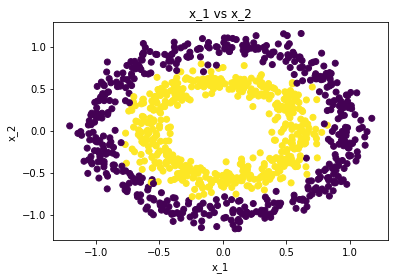

In [42]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('x_1 vs x_2')

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
#Training SVM with linear kernel-No kernel case
from sklearn import svm
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train,y_train)
y_pred_linear=clf_linear.predict(X_test)
sv_linear = clf_linear.support_vectors_

In [45]:
#Training SVM with polynomial kernel
clf_poly = svm.SVC(kernel='poly',degree=2,gamma='auto')
clf_poly.fit(X_train,y_train)
y_pred_poly = clf_poly.predict(X_test)
sv_poly = clf_poly.support_vectors_

In [46]:
from sklearn.metrics import confusion_matrix
cf_linear=confusion_matrix(y_test,y_pred_linear)
cf_poly = confusion_matrix(y_test,y_pred_poly)

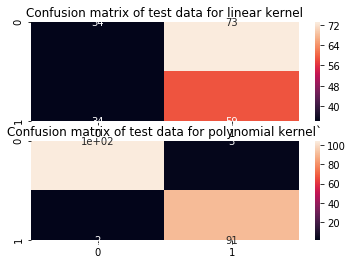

In [47]:
import seaborn as sn
plt.subplot(211)
plt.title('Confusion matrix of test data for linear kernel')
sn.heatmap(cf_linear,annot=True)
plt.subplot(212)
plt.title('Confusion matrix of test data for polynomial kernel`')
sn.heatmap(cf_poly,annot=True)

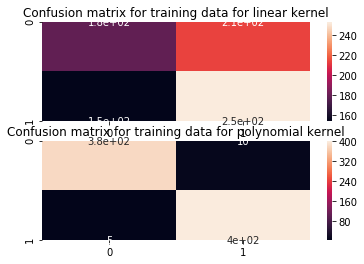

In [48]:
plt.subplot(211)
plt.title('Confusion matrix for training data for linear kernel')
cf_train_linear = confusion_matrix(y_train,clf_linear.predict(X_train))
sn.heatmap(cf_train_linear,annot=True)
plt.subplot(212)
plt.title('Confusion matrix for training data for polynomial kernel')
cf_train_poly = confusion_matrix(y_train,clf_poly.predict(X_train))
sn.heatmap(cf_train_poly,annot=True)

In [49]:
h=.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

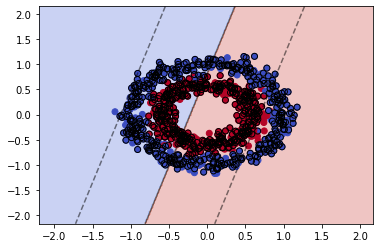

In [50]:
#Scatter plot with decision function for linear kernel
z_linear = clf_linear.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_linear = clf_linear.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
z_poly = clf_poly.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_poly = clf_poly.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_linear,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_linear, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_linear[:, 0], sv_linear[:, 1],linewidth=1, facecolors='None', edgecolors='k')

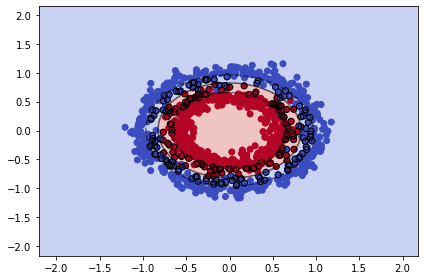

In [51]:
#Scatter plot and decision function for polynomial kernel
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_poly, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_poly[:, 0], sv_poly[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.tight_layout()

In [52]:
#Logistic regression with linear kernel - no kernel case
from sklearn.linear_model import LogisticRegression
clf_LR_linear=LogisticRegression(random_state=42).fit(X_train,y_train)
y_LR_pred=clf_LR_linear.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


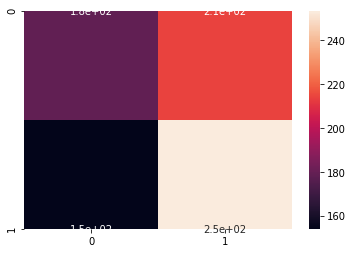

In [53]:
cf_LR_linear = confusion_matrix(y_test,y_LR_pred)
sn.heatmap(cf_train_linear,annot=True)

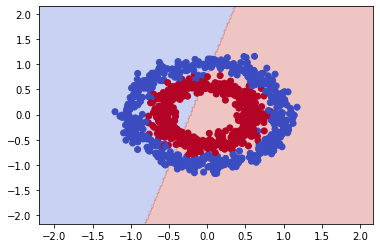

In [54]:
#Scatter plot for logistic regression - no kernel case
z_lr_linear = clf_linear.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_lr_linear,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)